In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [3]:
df = pd.read_csv('SleepingChild_out.csv')

In [4]:
df

,Reach,DateTime,elev,width,D50,slope,yield
0,upstream,2002-04-01 00:00,1579.594,0.0,63.669200,-0.012550,0.0
1,upstream,2002-04-01 01:00,1579.594,0.0,63.633882,-0.012546,0.0
2,upstream,2002-04-01 02:00,1579.594,0.0,63.633882,-0.012541,0.0
3,upstream,2002-04-01 03:00,1579.594,0.0,63.633882,-0.012537,0.0
4,upstream,2002-04-01 04:00,1579.594,0.0,63.633882,-0.012533,0.0
...,...,...,...,...,...,...,...
275530,feeder,2020-07-31 18:00,0.000,0.0,0.000000,0.000000,0.0
275531,feeder,2020-07-31 19:00,0.000,0.0,0.000000,0.000000,0.0
275532,feeder,2020-07-31 20:00,0.000,0.0,0.000000,0.000000,0.0
275533,feeder,2020-07-31 21:00,0.000,0.0,0.000000,0.000000,0.0


In [5]:
upstream = df[df['Reach']=='upstream']
df_us = df[df['Reach']=='deposit_upstream']
df_ds = df[df['Reach']=='deposit_downstream']
downstream = df[df['Reach']=='downstream']

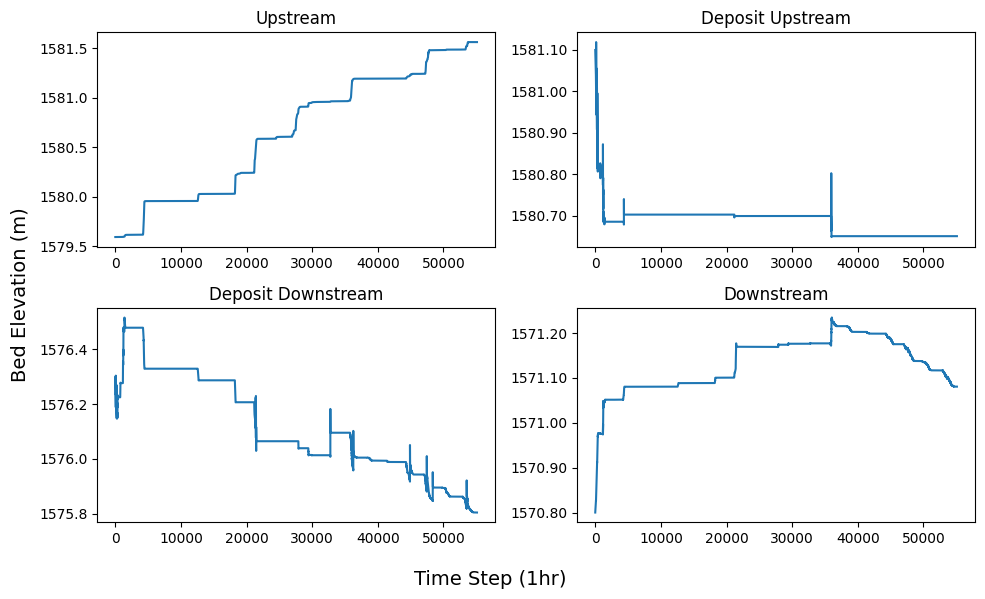

In [90]:
ts = np.arange(len(upstream))

fig, ax = plt.subplots(2,2, figsize=(10,6))
ax[0,0].plot(ts, upstream['elev'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(ts, df_us['elev'])
ax[0,1].set_title('Deposit Upstream')
ax[0,1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1,0].plot(ts, df_ds['elev'])
ax[1,0].set_title('Deposit Downstream')
ax[1,1].plot(ts, downstream['elev'])
ax[1,1].set_title('Downstream')
ax[1,1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.supxlabel('Time Step (1hr)', fontsize=14)
fig.supylabel('Bed Elevation (m)', fontsize=14)
plt.tight_layout()
#plt.savefig('/media/jordan/Elements/Geoscience/Bitterroot/figs/deposit_evolution/sc_elev.png', dpi=150)
plt.show()

Text(0.5, 1.0, 'Downstream')

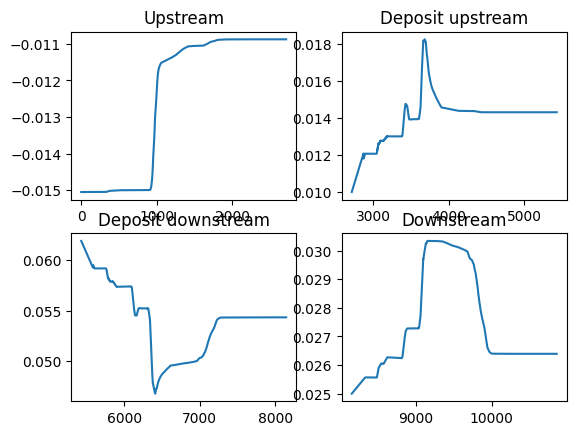

In [97]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['slope'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['slope'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['slope'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['slope'])
ax[1,1].set_title('Downstream')

Text(0.5, 1.0, 'Downstream')

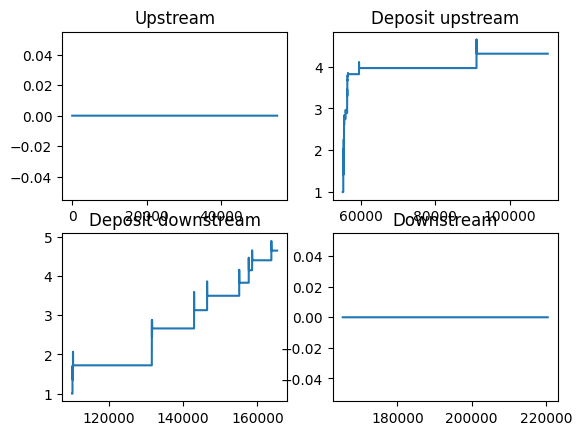

In [91]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['width'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['width'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['width'])
ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['width'])
ax[1,1].set_title('Downstream')

Text(0.5, 1.0, 'Downstream')

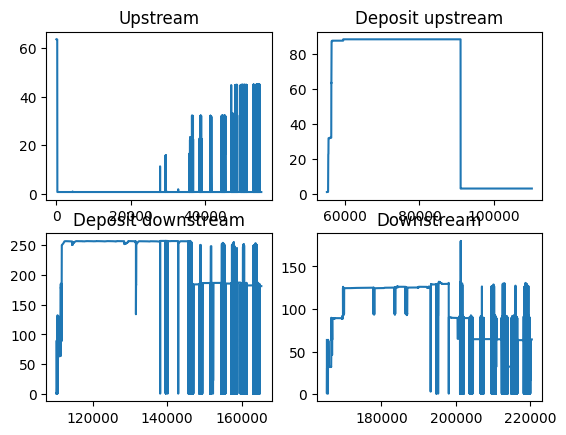

In [92]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(upstream['D50'])
ax[0,0].set_title('Upstream')
ax[0,1].plot(df_us['D50'])
ax[0,1].set_title('Deposit upstream')
ax[1,0].plot(df_ds['D50'])

ax[1,0].set_title('Deposit downstream')
ax[1,1].plot(downstream['D50'])
ax[1,1].set_title('Downstream')

In [93]:
print(downstream['yield'].sum())

1271927.4071649888


<Axes: >

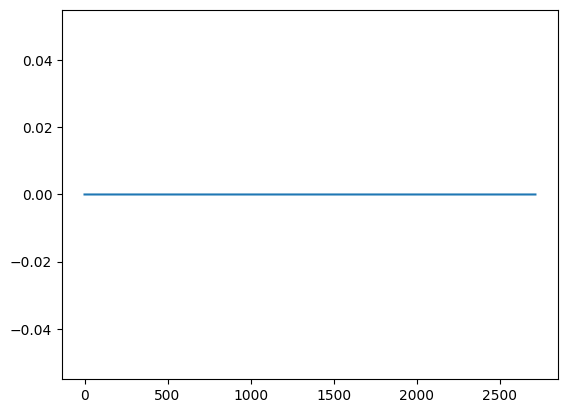

In [10]:
upstream['yield'].plot()

<Axes: >

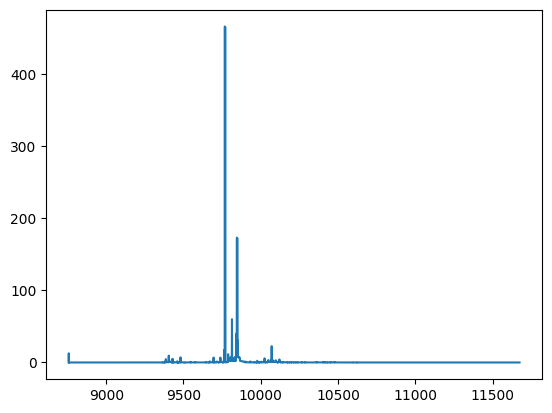

In [37]:
downstream['yield'].plot()

/tmp/ipykernel_6171/3770593073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['DateTime'] = pd.to_datetime(df_f['DateTime'])


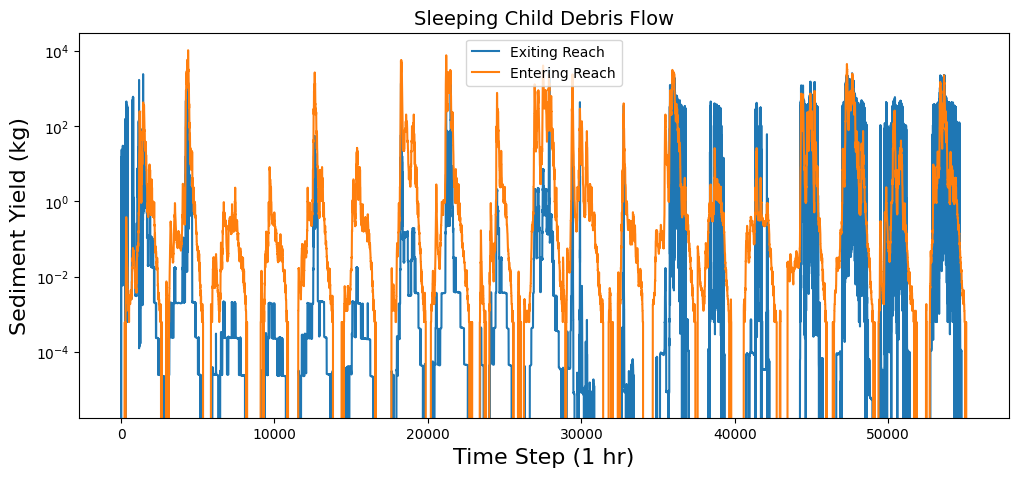

In [98]:
df_f = df[df['Reach'] == 'feeder']
df_f.reset_index(inplace=True)
downstream_r = downstream.reset_index()
half_year_locator = mdates.MonthLocator(interval=6)
df_f['DateTime'] = pd.to_datetime(df_f['DateTime'])

fig, ax = plt.subplots(figsize=(12,5))
#ax.plot(df_f['DateTime'], downstream_r['yield'], label='Exiting Reach')
#ax.plot(df_f['DateTime'], df_f['yield'], label='Entering Reach')
ax.plot(downstream_r['yield'], label='Exiting Reach')
ax.plot(df_f['yield'], label='Entering Reach')
ax.set_yscale('log')
ax.set_ylabel('Sediment Yield (kg)', fontsize=16)
ax.set_xlabel('Time Step (1 hr)', fontsize=16)
ax.set_title('Sleeping Child Debris Flow', fontsize=14)
plt.legend()
plt.savefig('/media/jordan/Elements/Geoscience/Bitterroot/figs/deposit_evolution/sc_inout.png', dpi=150)
plt.show()

In [15]:
start = None
end = None
for i in downstream.index:
    if downstream.loc[i, 'DateTime'] == '2002-04-01 00:00':
        start = i
    if downstream.loc[i, 'DateTime'] == '2002-07-31 22:00':
        end = i
        
print(start, end)

165321 168246


In [16]:
totyield = 0
for i in range(165321, 168247):
    totyield += downstream.loc[i, 'yield']
print(totyield)

921919.1083266385


downstream yield
2012: 914679 kg
2015: 193617
2018: 2195623 
2019: 435761
2020: 1319620 

In [20]:
for i in df_ds.index:
    if df_ds.loc[i, 'DateTime'] == '2021-07-31 00:00':
        print(df_ds.loc[i])

Reach       deposit_downstream
DateTime      2021-07-31 00:00
elev               1744.565202
width                 4.816041
D50                  87.389701
slope                 0.047996
yield                 0.018815
Name: 93487, dtype: object


In [100]:
df_us

,Reach,DateTime,elev,width,D50,slope,yield
55107,deposit_upstream,2002-04-01 00:00,1581.098963,1.000007,0.843870,0.040678,129.174330
55108,deposit_upstream,2002-04-01 01:00,1581.098444,1.000011,0.843791,0.040686,129.206437
55109,deposit_upstream,2002-04-01 02:00,1581.097925,1.000014,0.843864,0.040695,129.234077
55110,deposit_upstream,2002-04-01 03:00,1581.097406,1.000018,0.843944,0.040703,129.272930
55111,deposit_upstream,2002-04-01 04:00,1581.096887,1.000021,0.844025,0.040712,129.303721
...,...,...,...,...,...,...,...
110209,deposit_upstream,2020-07-31 18:00,1580.651254,4.310402,2.860713,0.041078,0.000000
110210,deposit_upstream,2020-07-31 19:00,1580.651254,4.310402,2.860713,0.041078,0.000000
110211,deposit_upstream,2020-07-31 20:00,1580.651254,4.310402,2.860713,0.041078,0.000000
110212,deposit_upstream,2020-07-31 21:00,1580.651254,4.310402,2.860713,0.041078,0.000000


In [84]:
tot = 0
for i in df_f.index:
    if '2019' in str(df_f.loc[i, 'DateTime']):
        tot += df_f.loc[i, 'yield']

In [86]:
tot = 0
for i in downstream.index:
    if '2019' in str(downstream.loc[i, 'DateTime']):
        tot += downstream.loc[i, 'yield']

In [87]:
tot

90496.83298466832